# 2022S CBD 3335 2 [B121] Data Mining and Analysis - Assignment 2

## Group Members

##### Bhanu Prakash Mahadevuni C0850515 
##### Deeksha Naikap C0835440
##### Pramod Reddy Gurrala C0850493
##### Sai Varun Kollipara C0828403

### Dataset

The dataset contains more than 50,000 images of different traffic signs. It is further classified into 43 different classes.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from PIL import Image 

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Load data

In [7]:
# List to store image data
data = []

# List to store image labels (classes)
labels = []

# Number of classes
classes = 43

# Current path of the dataset
current_path = './'

In [8]:
# Iterates between 0 and 42 (43 classes)
for i in range(classes):
    
    # Path of each image
    path = os.path.join(current_path, 'train', str(i))
    images = os.listdir(path)
    
    # Iterates between each image
    for a in images:
        # Try to load the images
        try:
            # Open the image
            image = Image.open(path + '/' + a)
            # Resizes the image to 30x30
            image = image.resize((30, 30))
            # Turns the image into an array
            image = np.array(image)
            # Append the image to "data" list
            data.append(image)
            # Append the label to "labels" list
            labels.append(i)
        # If it doesn't work, shows an error message
        except:
            print('Error loading images!')

In [9]:
# Turns lists into array
data = np.array(data)
labels = np.array(labels)

In [10]:
# Printing the shape of the data and labels
print('Data Shape: ', data.shape)
print('Labels Shape', labels.shape)

Data Shape:  (39209, 30, 30, 3)
Labels Shape (39209,)


# Split the data

In [11]:
# 80% to Train and 20% to Test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state=42)

print(X_train.shape,'|', X_test.shape,'|',y_train.shape,'|',y_test.shape)

(31367, 30, 30, 3) | (7842, 30, 30, 3) | (31367,) | (7842,)


In [12]:
# Use "to_categorical" method to convert the labels present in y_train and y_test into one-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Modeling

The architecture of our model is:

- **2** Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)
- MaxPool2D layer ( pool_size=(2,2))
- Dropout layer (rate=0.25)
- **2** Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)
- MaxPool2D layer ( pool_size=(2,2))
- Dropout layer (rate=0.25)
- Flatten layer to squeeze the layers into 1 dimension
- Dense Fully connected layer (256 nodes, activation=”relu”)
- Dropout layer (rate=0.5)
- Dense layer (43 nodes, activation=”softmax”)

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))

### Compile the model

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train and validate the model

In [15]:
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 30s 61ms/step - loss: 2.5440 - accuracy: 0.3905 - val_loss: 0.9465 - val_accuracy: 0.8166
Epoch 2/15
491/491 [==============================] - 33s 67ms/step - loss: 1.1097 - accuracy: 0.6879 - val_loss: 0.4938 - val_accuracy: 0.8965
Epoch 3/15
491/491 [==============================] - 32s 64ms/step - loss: 0.8417 - accuracy: 0.7580 - val_loss: 0.3823 - val_accuracy: 0.9110
Epoch 4/15
491/491 [==============================] - 34s 68ms/step - loss: 0.6986 - accuracy: 0.7946 - val_loss: 0.2857 - val_accuracy: 0.9288
Epoch 5/15
491/491 [==============================] - 33s 67ms/step - loss: 0.5464 - accuracy: 0.8395 - val_loss: 0.2033 - val_accuracy: 0.9522
Epoch 6/15
491/491 [==============================] - 33s 68ms/step - loss: 0.4219 - accuracy: 0.8772 - val_loss: 0.1720 - val_accuracy: 0.9517
Epoch 7/15
491/491 [==============================] - 33s 67ms/step - loss: 0.3720 - accuracy: 0.8908 - val_loss: 0.1380 - val_accuracy:

# Plot results

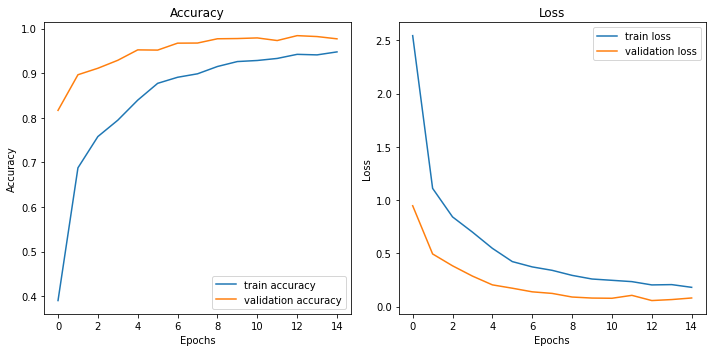

In [16]:
# Figure size
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# Plot train and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
# Plot loss and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Test model with test dataset

### Read test data

In [17]:
y_test = pd.read_csv('./Test.csv')
y_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


Our dataset contains a **test-data** folder and in a **test.csv** file, we have the details related to the image path and their respective class labels.

### Evaluate

In [25]:
# Target
labels = y_test['ClassId'].values

In [26]:
# Test data path
current_path = './'

In [27]:
# Images path
imgs = current_path + y_test['Path'].values

In [28]:
# Store image data
data = []

In [29]:
for img in imgs:
    # Open image
    image = Image.open(img)
    # Resize to 30x30
    image = image.resize((30, 30))
    # Append in "data" list
    data.append(np.array(image))

In [30]:
# Convert "data" list to array
X_test = np.array(data)

In [31]:
# Make predictions
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)

In [32]:
# Evaluate model
print('ACCURACY: {} %'.format(round(accuracy_score(labels, classes_x) * 100, 3)))

ACCURACY: 93.563 %


# Save model

In [33]:
model.save('traffic_classifier.h5')

# Considerations

There is an accuracy of 93% while testing. Which can be improved by increasing the epochs.

# Program interface

### Code

In [34]:
# Libraries
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model

In [35]:
# Load your model
model = load_model('traffic_classifier.h5')

In [36]:
# Dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }


In [37]:
# Initialise GUI
top=tk.Tk()

# Window dimensions (800x600)
top.geometry('800x600')

# Window title
top.title('Traffic sign classification')

# Window background color
top.configure(background='#CDCDCD')

# Window label
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))

# Sign image
sign_image = Label(top)

In [38]:
# Function to classify image
def classify(file_path):
    global label_packed
    
    # Open the image file path
    image = Image.open(file_path)
    
    # Resize the image
    image = image.resize((30,30))
    
    # Inserts a new axis that will appear at the axis position in the expanded array shape
    image = numpy.expand_dims(image, axis=0)
    
    # Convert to numpy array
    image = numpy.array(image)
    
    # Make prediction  
    pred = model.predict([image])[0]
    classes_x = np.argmax(pred)
    
    sign = classes[classes_x+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

In [39]:
# Function to show the "classify" button
def show_classify_button(file_path):
    # Create the button
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    
    # Configure button colors
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    
    # Configure button place (location)
    classify_b.place(relx=0.79,rely=0.46)

In [40]:
# Function to upload image
def upload_image():
    try:
        # Path of the image
        file_path=filedialog.askopenfilename()
        # Open file path
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

In [41]:
# Create "Upload" button
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)

# "Upload" button colors and font
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

# Button location
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)

# Window title text
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))

# Window colors
heading.configure(background='#CDCDCD',foreground='#364156')

In [42]:
heading.pack()
top.mainloop()

No passing
Speed limit (30km/h)
No vehicles
Yield
